In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [49]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)

In [50]:
# reflect an existing database into a new model
# reflect the tables
# View all of the classes that automap found

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [51]:
# Save references to each table

measur = Base.classes.measurement
stn = Base.classes.station

In [52]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [53]:
# Checking the name and type of data in the database
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for col in columns:
    print(col['name'], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [54]:
# Find the most recent date in the data set.

most_recent_date = session.query(measur.date).order_by(measur.date.desc()).first()
print(f" This is the latest date from the data: {most_recent_date}")

 This is the latest date from the data: ('2017-08-23',)


In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"{one_year_ago} was the data point one year ago from {most_recent_date}.\n")

# Perform a query to retrieve the data and precipitation scores
# Query for last 12 months between 08-23-2016 and 08-23-2017
# Arranged in descending order
prcp_data = session.query(measur.date, measur.prcp).\
filter(measur.date >= '2016-08-23', measur.date <= '2017-08-23').\
order_by(measur.date.desc()).all()

# To organize the data and to print in a more readable format
for record in prcp_data:
    print(record)
    
# Save the query restuls as a Pandas DataFram and set the index to the date column 
prcp_data_df = pd.DataFrame(prcp_data, columns = ["date", "prcp"])
prcp_data_df.set_index("date", inplace = True)

# Sort the dataframe by date
prcp_data_df = prcp_data_df.sort_values(["date"])
prcp_data_df.head(50)

2016-08-23 was the data point one year ago from ('2017-08-23',).

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-0

('2017-01-19', 0.0)
('2017-01-19', 0.0)
('2017-01-19', 0.0)
('2017-01-19', None)
('2017-01-19', 0.0)
('2017-01-19', 0.02)
('2017-01-19', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.0)
('2017-01-18', None)
('2017-01-18', 0.0)
('2017-01-18', 0.07)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-16', 0.0)
('2017-01-16', 0.0)
('2017-01-16', None)
('2017-01-16', 0.0)
('2017-01-16', 0.0)
('2017-01-16', 0.0)
('2017-01-15', 0.0)
('2017-01-15', 0.0)
('2017-01-15', None)
('2017-01-15', 0.0)
('2017-01-15', 0.01)
('2017-01-14', 0.0)
('2017-01-14', 0.0)
('2017-01-14', 0.0)
('2017-01-14', 0.01)
('2017-01-14', 0.0)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-13', None)
('2017-01-13', None)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-12', 0.0)
('2017-01-12', 0.0)
('2017-01-12', None)
('2017-01-12', None)
('2017-01-12', 0.0)
('2017-01-12', 0.0)
('2017-01-11', 0.0)
('2017-0

,prcp
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,0.05
2016-08-24,1.45
2016-08-24,2.15


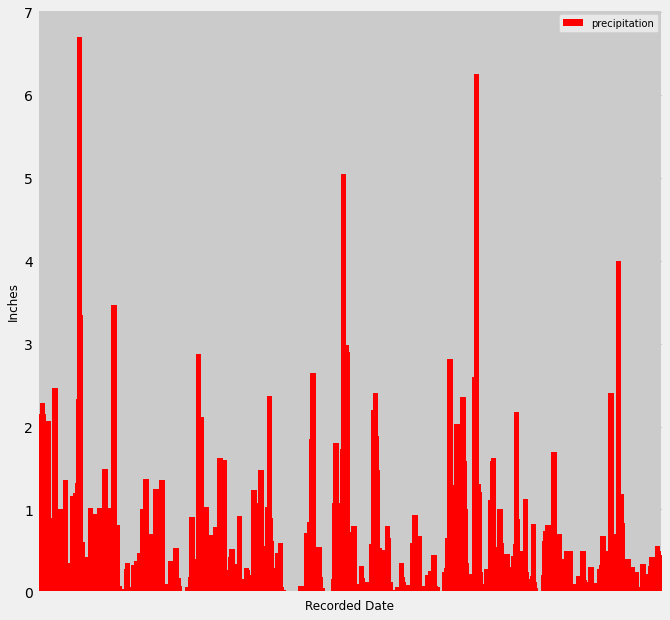

In [56]:
# Use Pandas Plotting with Matplotlib to plot the data
ax= prcp_data_df.plot.bar(y = 'prcp', color = 'red', rot = 0, figsize = (10, 10), width = 20)
ax.set_xlabel("Recorded Date", fontsize = 12)
ax.set_ylabel("Inches", fontsize = 12)
ax.set_xticklabels([])
plt.legend(['precipitation'], fontsize=10)

plt.show()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Stat_summary = prcp_data_df['prcp'].describe()
print(Stat_summary)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(stn).group_by(stn.station).count()
print(station_count)

9


In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_Stations = session.query(measur.station, func.count(measur.date)).\
group_by(measur.station).order_by(func.count(measur.date).desc()).all()

Active_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest,
# highest, and average temperature.

Min = session.query(func.min(measur.tobs)).filter(measur.station == 'USC00519281').all()
Max = session.query(func.max(measur.tobs)).filter(measur.station == 'USC00519281').all()
Avg = session.query(func.avg(measur.tobs)).filter(measur.station == 'USC00519281').all()

print(f"Stats for station USC00519281: Min Temp: {Min}, Max Temp: {Max}, Avg. Temp: {Avg}")

Stats for station USC00519281: Min Temp: [(54.0,)], Max Temp: [(85.0,)], Avg. Temp: [(71.66378066378067,)]


In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Active_Station_history = session.query(measur.date, measur.tobs).\
filter(measur.station == 'USC00519281', measur.date >= '2016-08-23', measur.date <= '2017-08-23').\
order_by(measur.date.desc()).all()

# To organize the data and to print in a more readable format
for history in Active_Station_history:
    print(history)

('2017-08-18', 79.0)
('2017-08-17', 76.0)
('2017-08-16', 76.0)
('2017-08-15', 77.0)
('2017-08-14', 77.0)
('2017-08-13', 77.0)
('2017-08-06', 83.0)
('2017-08-05', 82.0)
('2017-08-04', 77.0)
('2017-07-31', 76.0)
('2017-07-30', 81.0)
('2017-07-29', 82.0)
('2017-07-28', 81.0)
('2017-07-27', 76.0)
('2017-07-26', 75.0)
('2017-07-25', 77.0)
('2017-07-24', 75.0)
('2017-07-23', 82.0)
('2017-07-22', 77.0)
('2017-07-21', 77.0)
('2017-07-20', 77.0)
('2017-07-19', 76.0)
('2017-07-18', 76.0)
('2017-07-17', 76.0)
('2017-07-16', 80.0)
('2017-07-15', 80.0)
('2017-07-14', 76.0)
('2017-07-13', 74.0)
('2017-07-12', 74.0)
('2017-07-11', 72.0)
('2017-07-10', 69.0)
('2017-07-09', 78.0)
('2017-07-08', 78.0)
('2017-07-07', 75.0)
('2017-07-06', 74.0)
('2017-07-05', 77.0)
('2017-07-04', 78.0)
('2017-07-03', 76.0)
('2017-07-02', 81.0)
('2017-07-01', 79.0)
('2017-06-30', 76.0)
('2017-06-29', 76.0)
('2017-06-28', 77.0)
('2017-06-27', 76.0)
('2017-06-26', 73.0)
('2017-06-25', 71.0)
('2017-06-24', 77.0)
('2017-06-23'

In [68]:
Historical_temp_df = pd.DataFrame(Active_Station_history, columns = ['date','tobs'])
Historical_temp_df.head()

,date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0


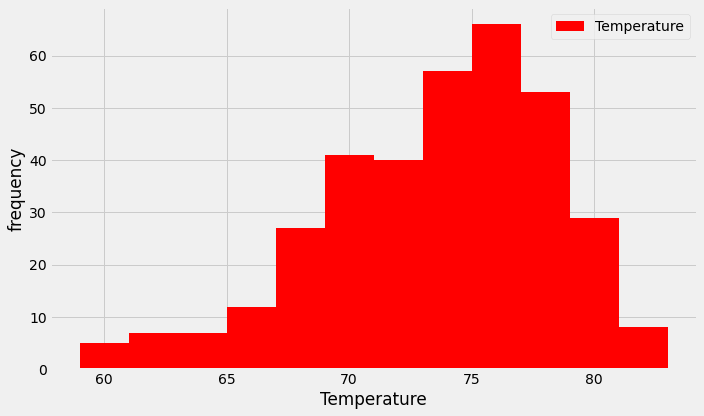

<Figure size 432x288 with 0 Axes>

In [73]:
# Plotting histogram of observed temp.
plt.figure(figsize=(10,6))
plt.hist(Historical_temp_df["tobs"], color = 'red', bins=12)
plt.xlabel("Temperature")
plt.ylabel("frequency")
plt.legend(["Temperature"])
plt.tight_layout()
plt.show()

# Save the plot
plt.tight_layout()
plt.savefig("images/frequecy.png")
plt.show()

# Close session

In [72]:
# Close Session
session.close()